### Building a simple linear regression model with Scikit-learn

### Loading a sample dataset
Load the Advertising dataset from Kaggle. The dataset is a CSV file with four columns. We will use it to build a simple linear regression model to predict the Sales (dependent/target variable) based on the investment (independent variable) to TV, Radio and Newspaper.

In [1]:
import pandas as pd
data = pd.read_csv('Advertising.csv')
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


Before building the linear regression model, we must first understand the data:

In [2]:
data.shape

(200, 4)

We can plot a scatter plot to determine whether linear regression is the ideal method for predicting the Sales based on TV, Radio and Newspaper:

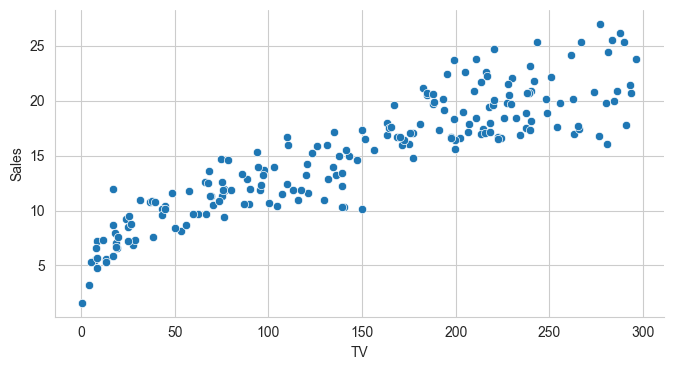

In [3]:
import seaborn as sns

sns.relplot(x='TV', y='Sales', data=data, 
            height=3.8, aspect=1.8, kind='scatter')
sns.set_style('dark')

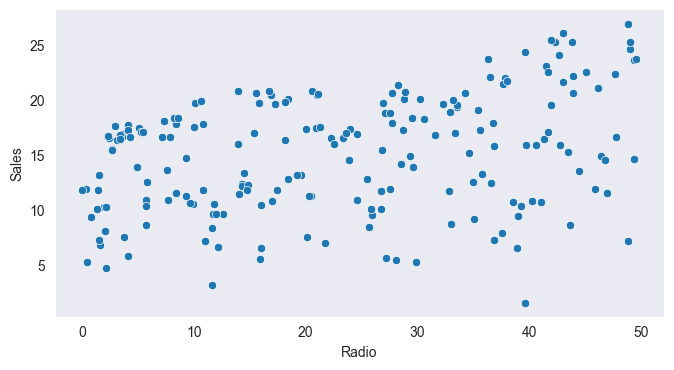

In [4]:
import seaborn as sns

sns.relplot(x='Radio', y='Sales', data=data, 
            height=3.8, aspect=1.8, kind='scatter')
sns.set_style('dark')

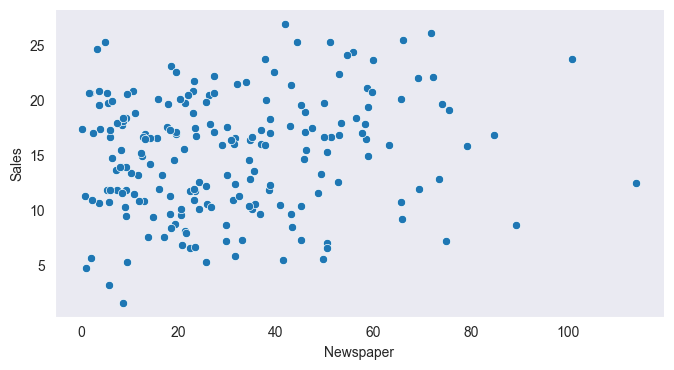

In [5]:
import seaborn as sns

sns.relplot(x='Newspaper', y='Sales', data=data, 
            height=3.8, aspect=1.8, kind='scatter')
sns.set_style('dark')

There is a linearly increasing relationship between the dependent and independent variables; thus, linear regression is the best model for the prediction.
Note that we could actually discard the Radio and Newspaper columns because they don't have a good linear correlation with Sales.

Splitting the data
Scikit-learn provides a train_test_split function for splitting the datasets into train and test subsets. We will split our dataset in the ratio of 70:30.

Create the feature matrix(X) and the response vector(y):

In [6]:
X = data.iloc[:,:-1].values # feature matrix
y = data.iloc[:,-1].values # response vector
y   # Why is radio the response vector?

array([22.1, 10.4, 12. , 16.5, 17.9,  7.2, 11.8, 13.2,  4.8, 15.6, 12.6,
       17.4,  9.2, 13.7, 19. , 22.4, 12.5, 24.4, 11.3, 14.6, 18. , 17.5,
        5.6, 20.5,  9.7, 17. , 15. , 20.9, 18.9, 10.5, 21.4, 11.9, 13.2,
       17.4, 11.9, 17.8, 25.4, 14.7, 10.1, 21.5, 16.6, 17.1, 20.7, 17.9,
        8.5, 16.1, 10.6, 23.2, 19.8,  9.7, 16.4, 10.7, 22.6, 21.2, 20.2,
       23.7,  5.5, 13.2, 23.8, 18.4,  8.1, 24.2, 20.7, 14. , 16. , 11.3,
       11. , 13.4, 18.9, 22.3, 18.3, 12.4,  8.8, 11. , 17. ,  8.7,  6.9,
       14.2,  5.3, 11. , 11.8, 17.3, 11.3, 13.6, 21.7, 20.2, 12. , 16. ,
       12.9, 16.7, 14. ,  7.3, 19.4, 22.2, 11.5, 16.9, 16.7, 20.5, 25.4,
       17.2, 16.7, 23.8, 19.8, 19.7, 20.7, 15. ,  7.2, 12. ,  5.3, 19.8,
       18.4, 21.8, 17.1, 20.9, 14.6, 12.6, 12.2,  9.4, 15.9,  6.6, 15.5,
        7. , 16.6, 15.2, 19.7, 10.6,  6.6, 11.9, 24.7,  9.7,  1.6, 17.7,
        5.7, 19.6, 10.8, 11.6,  9.5, 20.8,  9.6, 20.7, 10.9, 19.2, 20.1,
       10.4, 12.3, 10.3, 18.2, 25.4, 10.9, 10.1, 16

In [7]:
# SPLITTING THE DATA
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(140, 3)
(60, 3)
(140,)
(60,)


### Fitting simple linear regression
Import the LinearRegression class from the linear_model to train the model. Instantiate an object of the class named regressor.

In [8]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

The regressor object is also called an estimator. An estimator is any object that fits a model based on some training data and is capable of inferring some properties on new data. All estimators implement a fit method.

The fit method takes the training data as the argument. We use this method to estimate some parameters of a model. For instance, we have passed in the X_train and the y_train – the independent and dependent variables. The model learns the correlations between the predictor and target variables.

Getting the coefficient/slope and the intercept
Now that we have fitted the model, we can check the slope and the intercept of the simple linear fit.

Coefficient:

In [9]:
print(regressor.coef_)
from statistics import mean
print(mean(regressor.coef_))
print(regressor.intercept_)

[ 0.05502392  0.10251003 -0.00150711]
0.05200894645195175
4.661439720130813


The coefficient shows that, on average, the sales increased by approximately 5.20145677e-18 points for TV investment.

### Linear regression model fit line
The Seaborn regplot function enables us to visualize the linear fit of the model. It will draw a scatter plot of the variables and then fit the linear regression model. The regression line will be plotted with a 95% confidence interval.

<Axes: xlabel='TV', ylabel='Sales'>

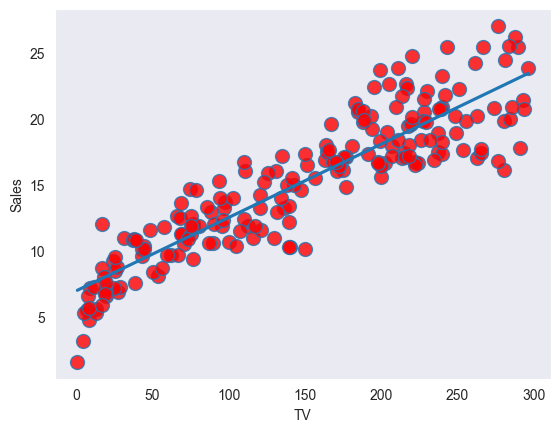

In [10]:
sns.regplot(x='TV', y='Sales', data=data, ci=None, scatter_kws={'s':100, 'facecolor':'red'})

<Axes: xlabel='Newspaper', ylabel='Sales'>

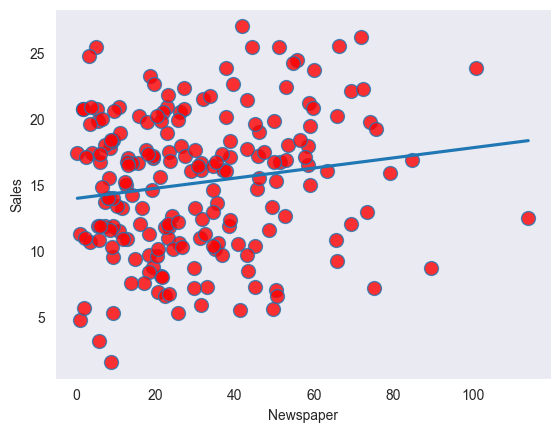

In [11]:
sns.regplot(x='Newspaper', y='Sales', data=data, ci=None, scatter_kws={'s':100, 'facecolor':'red'})

<Axes: xlabel='Radio', ylabel='Sales'>

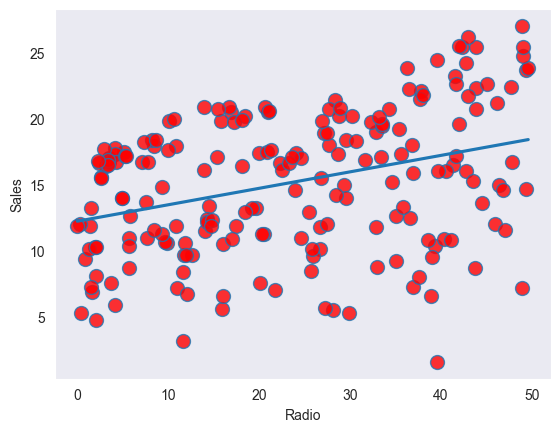

In [12]:
sns.regplot(x='Radio', y='Sales', data=data, ci=None, scatter_kws={'s':100, 'facecolor':'red'})

### Predicting test set result
At this point, the model is now trained and ready to predict the output of new observations. Remember, we split our dataset into train and test sets. We will provide test sets to the model and check its performance.

In [13]:
y_pred = regressor.predict(X_test)
y_pred

array([21.28816103, 18.04213212, 10.0595901 , 21.08224067, 20.76476044,
       24.47187353, 16.80643646, 15.62885738, 10.12479884, 18.84601896,
       15.78389695, 10.54297035, 18.92928707, 15.52557996, 17.8412711 ,
       15.24120343, 13.74212833, 21.0643733 , 10.05392699, 19.26500889,
       11.16451173, 11.97211832,  8.61179009, 11.98972141, 12.59914023,
       16.8447954 ,  9.7170889 , 21.09489946, 18.13942474, 19.55008709,
       22.08796224, 17.78527998, 16.53883452, 14.77303861, 21.39458945,
       16.95491635, 17.22755002, 12.31866943, 21.04982199,  7.77473926,
        5.38467516,  9.63139004,  6.89549204, 19.19507436,  7.88125192,
       15.18766673, 13.70978421, 21.0232936 , 20.5350058 , 20.48867548,
       24.86087902, 14.96304281,  7.33545571, 19.35630325, 21.32554066,
       14.7719757 , 17.19642519,  7.11988693, 18.30096543,  9.65158222])

In [14]:
comparison_df = pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
comparison_df

,Actual,Predicted
0,23.8,21.288161
1,16.6,18.042132
2,11.9,10.059590
3,19.8,21.082241
4,17.6,20.764760
5,25.5,24.471874
6,16.9,16.806436
7,17.9,15.628857
8,10.5,10.124799
9,17.1,18.846019


Checking the residuals:

In [15]:
residuals = y_test - y_pred
residuals

array([ 2.51183897e+00, -1.44213212e+00,  1.84040990e+00, -1.28224067e+00,
       -3.16476044e+00,  1.02812647e+00,  9.35635414e-02,  2.27114262e+00,
        3.75201156e-01, -1.74601896e+00,  1.71610305e+00,  7.57029651e-01,
       -1.52928707e+00,  1.17442004e+00,  5.58728897e-01,  6.58796572e-01,
       -8.42128331e-01, -3.26437330e+00, -5.53926985e-01, -8.65008890e-01,
       -4.64511734e-01,  5.27881678e-01, -1.11790088e-01, -4.89721408e-01,
       -6.99140231e-01,  3.05520460e+00,  3.82911104e-01, -2.19489946e+00,
        1.46057526e+00,  1.34991291e+00,  1.11203776e+00, -8.85279977e-01,
        7.61165476e-01,  1.92696139e+00, -1.19458945e+00,  3.54508365e+00,
       -7.27550023e-01, -1.31866943e+00,  1.25017801e+00, -1.74739259e-01,
       -8.46751570e-02,  2.36860996e+00, -1.95492043e-01, -1.95074361e-01,
       -2.38125192e+00, -5.87666727e-01,  8.90215788e-01,  4.76706403e-01,
        2.06499420e+00, -7.88675485e-01,  5.39120980e-01,  2.36957187e-01,
       -7.35455707e-01,  

Comparing the test data and the predicted values with a scatter plot:

Text(0, 0.5, 'Predictions')

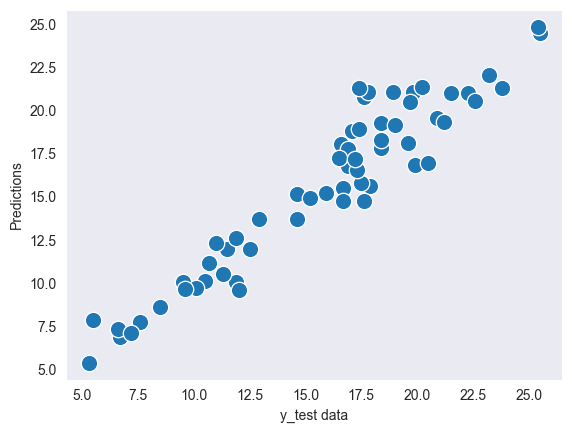

In [16]:
import matplotlib.pyplot as plt
#sns.scatterplot(x=y_test, y = y_pred, ci=None, s=140)
sns.scatterplot(x=y_test, y = y_pred,s=140)
plt.xlabel('y_test data')
plt.ylabel('Predictions')

The values seem to align linearly, which shows that the model is acceptable.

### Evaluating linear regression models

Mean Absolute Error(MAE) calculates the absolute difference between the actual and predicted values. We get the sum of all the prediction errors and divide them by the total number of data points.

In [17]:
from sklearn.metrics import mean_absolute_error
print('MAE:', mean_absolute_error(y_test,y_pred))

MAE: 1.1947417134056737


Mean Squared Error(MSE): This is the most used metric. It finds the squared difference between actual and predicted values. We get the sum of the square of all prediction errors and divide it by the number of data points.

In [18]:
from sklearn.metrics import mean_squared_error
print("MSE",mean_squared_error(y_test,y_pred))

MSE 2.370659971225658


Root Mean Squared Error(RMSE) is the square root of MSE. Since MSE is calculated by the square of error, the square root brings it back to the same level of prediction error.

In [19]:
import numpy as np
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE 1.5396947656031237


R Squared(R2): R2 is also called the coefficient of determination or goodness of fit score regression function. It measures how much irregularity in the dependent variable the model can explain. The R2 value is between 0 to 1, and a bigger value shows a better fit between prediction and actual value.

In [20]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)
print(r2)

0.9071151423684273


The model has a pretty good score, meaning it was excellent in predicting the sales.

### Remarks on the model
We can conclude that the simple linear model we built works fine in predicting the sales based on the investment on TV, Radio and Newspaper since the errors were relatively low and the R2 score was high.

Adapted from https://www.machinelearningnuggets.com/python-linear-regression/